## Heart Failure Prediction

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


## Dataset Properties

#### Shape

In [4]:
heart_df.shape

(918, 12)

#### Columns

In [5]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#### Numerical Columns

In [6]:
heart_df.select_dtypes(include='number').columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

#### Categorical Columns

In [7]:
heart_df.select_dtypes(include='object').columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

#### Dataframe Info

In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Statistics

#### Quantiles

In [9]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Correlations

In [10]:
heart_df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


## Data Cleaning

#### Remove Duplicates

In [11]:
heart_df.duplicated().sum()

0

#### Nulls

In [12]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Uniques

In [13]:
heart_df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [14]:
heart_df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
heart_df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
heart_df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [17]:
heart_df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

## EDA

#### Categorical Columns

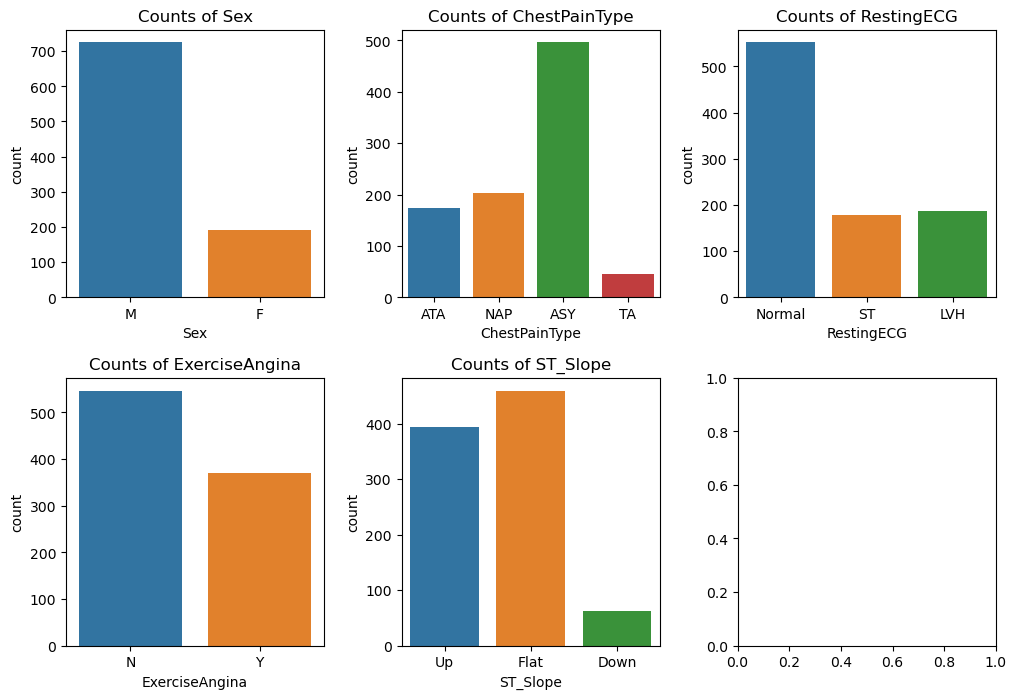

In [18]:
columns = heart_df.select_dtypes(include='object').columns

plt.subplots(2,3,figsize=(3*4,2*4))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.countplot(x = i, data = heart_df)
    plt.title(f'Counts of {i}')
    k += 1

plt.show()

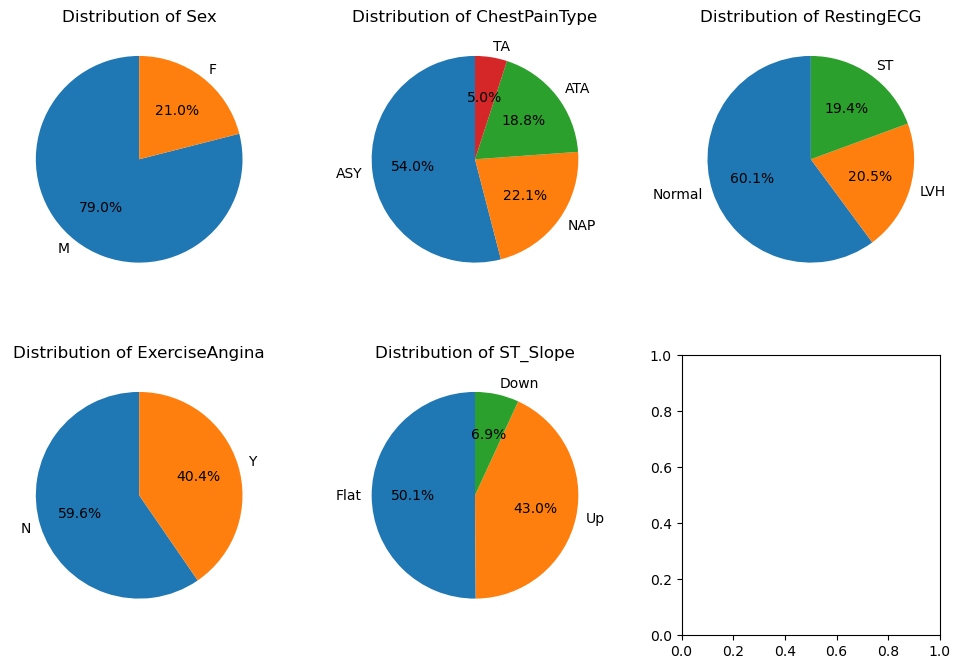

In [19]:
columns = heart_df.select_dtypes(include='object').columns

plt.subplots(2,3,figsize=(3*4,2*4))
plt.subplots_adjust(wspace=0.3,hspace=0.2)

k = 1
for i in columns:
    col_dict = dict(heart_df[i].value_counts())
    plt.subplot(2,3,k)
    plt.pie(x = col_dict.values(), labels = col_dict.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

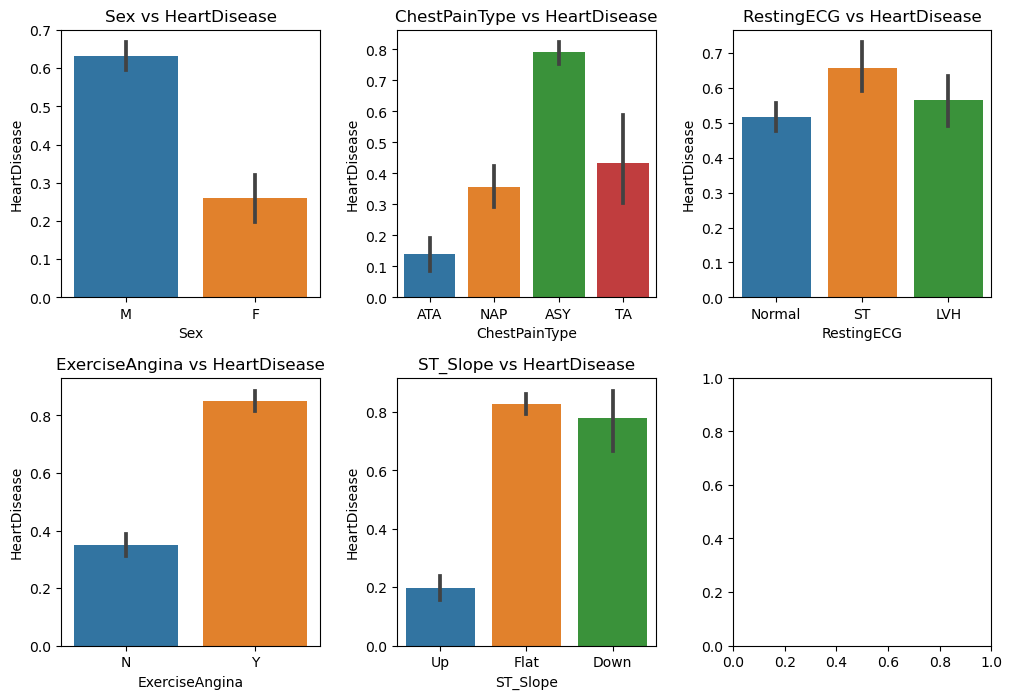

In [20]:
columns = heart_df.select_dtypes(include='object').columns

plt.subplots(2,3,figsize=(3*4,2*4))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.barplot(x = i, data = heart_df, y = 'HeartDisease')
    plt.title(f'{i} vs HeartDisease')
    k += 1

plt.show()

#### Numerical Columns

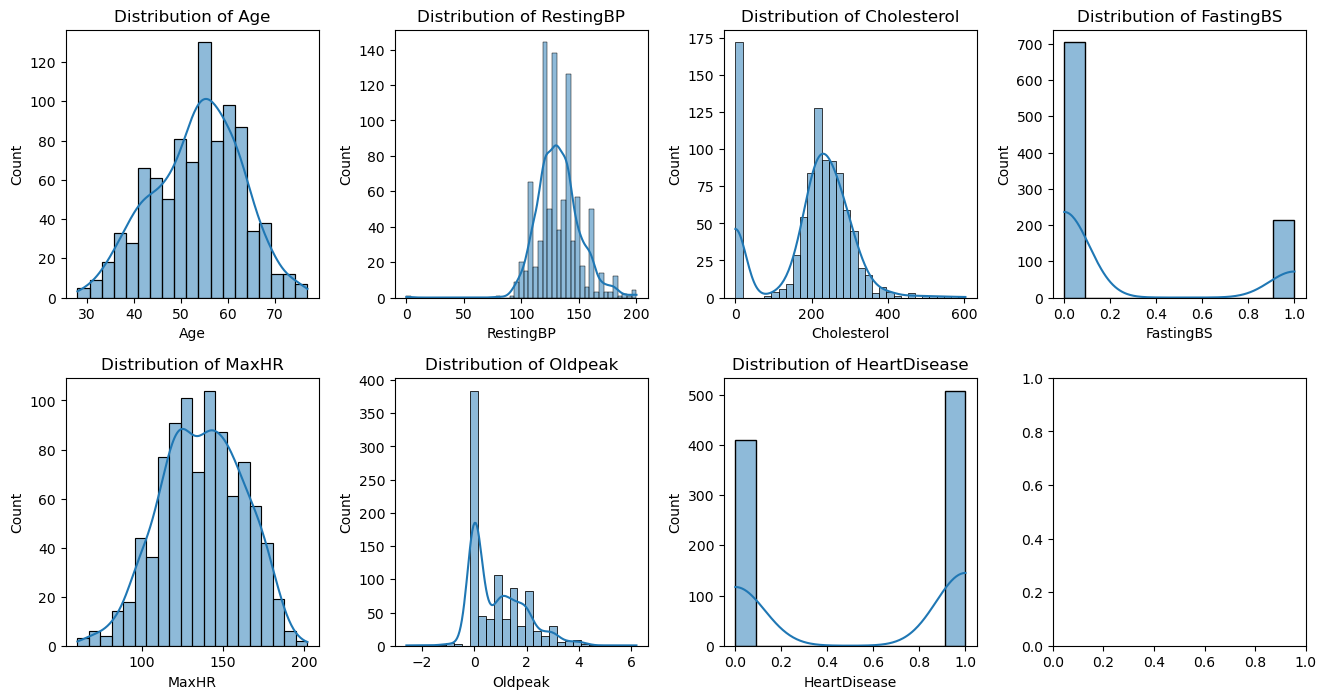

In [21]:
columns = heart_df.select_dtypes(include='number').columns

plt.subplots(2,4,figsize=(4*4, 2*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,4,k)
    sns.histplot(x = i, data = heart_df, kde = True)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

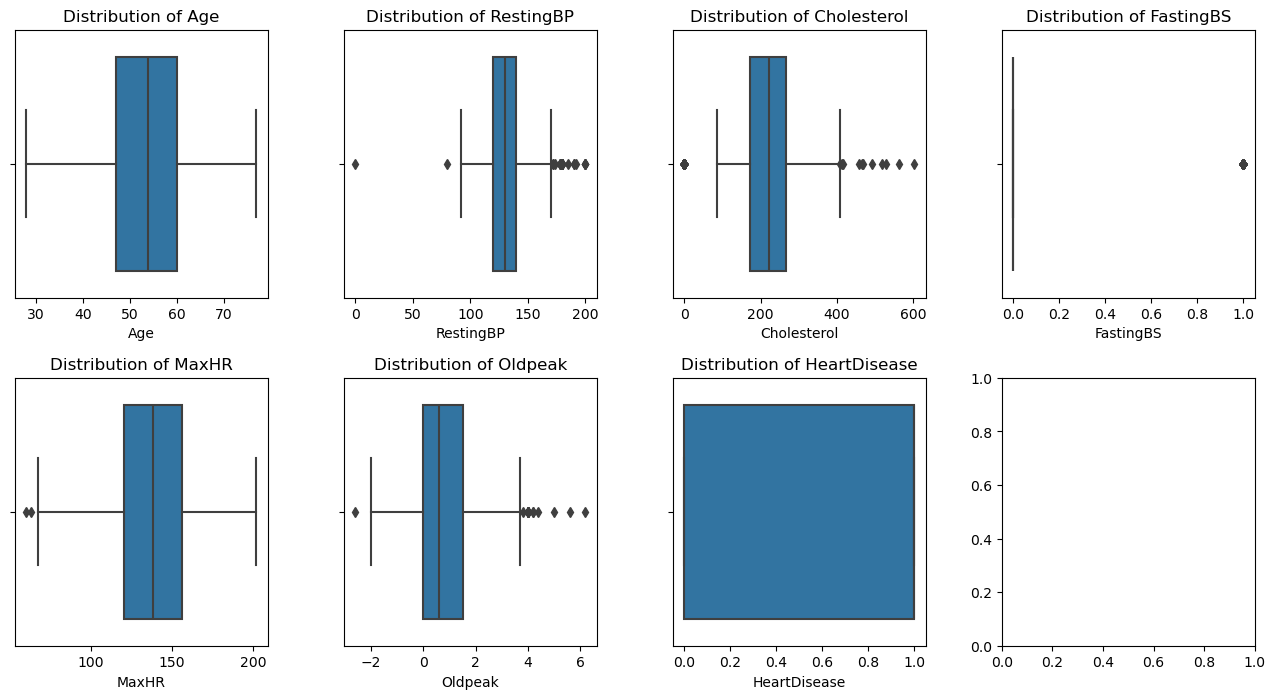

In [22]:
plt.subplots(2,4,figsize=(4*4, 2*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,4,k)
    sns.boxplot(x = i, data = heart_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

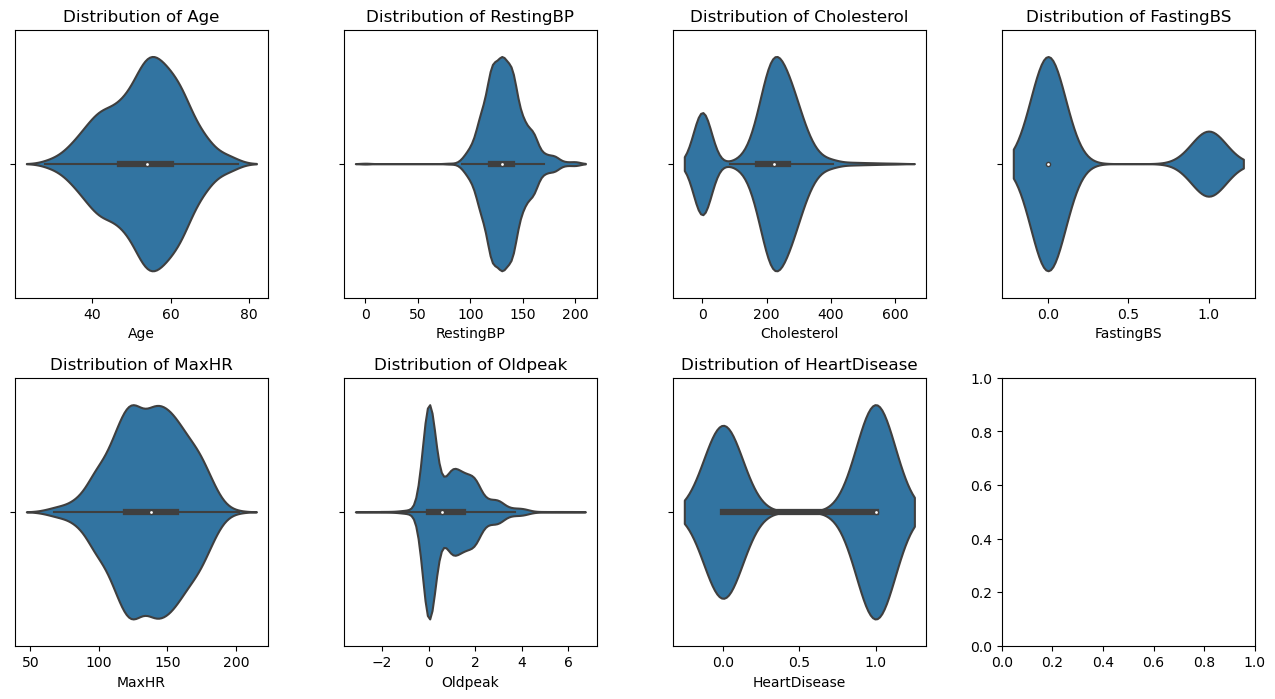

In [23]:
plt.subplots(2,4,figsize=(4*4, 2*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,4,k)
    sns.violinplot(x = i, data = heart_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

## Data Splitting

In [24]:
X = heart_df.drop(columns=['HeartDisease'])
Y = heart_df['HeartDisease']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((734, 11), (734,))

## Data Preprocessing

#### Column Transformer

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ct = ColumnTransformer(transformers=[('rob_scaler', RobustScaler(), ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']),
                                     ('min_max_scaler', MinMaxScaler(), ['Age']), 
                                     ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 
                                      ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope']), 
                                     ('ord_encoder', OrdinalEncoder(categories=[['N', 'Y']]), ['ExerciseAngina'])], 
                       remainder='passthrough', sparse_threshold=0)
ct

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('rob_scaler', RobustScaler(),
                                 ['RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak']),
                                ('min_max_scaler', MinMaxScaler(), ['Age']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ST_Slope']),
                                ('ord_encoder',
                                 OrdinalEncoder(categories=[['N', 'Y']]),
                                 ['ExerciseAngina'])])

## Model Selection

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

models = {
    'log_reg': LogisticRegression(),
    'svm': SVC(),
    'dec_tree': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(),
    'ran_forest': RandomForestClassifier(),
    'ex_trees': ExtraTreesClassifier(),
    'gbm': GradientBoostingClassifier(),
    'hgbm': HistGradientBoostingClassifier()
}

#### Cross Validations

In [28]:
from sklearn.model_selection import cross_val_score

cross_val_df = pd.DataFrame(index=models.keys(), columns=['Cross_Validation_Accuracy', 'Accuracy'])
X_pr = ct.fit_transform(X)

for i in models:
    scores = cross_val_score(models[i], X_pr, Y, cv = 5)
    cross_val_df.loc[i, 'Cross_Validation_Accuracy'] = scores
    cross_val_df.loc[i, 'Accuracy'] = scores.mean()
    print(f'{i} is cross validated ....!')

log_reg is cross validated ....!
svm is cross validated ....!
dec_tree is cross validated ....!
knn is cross validated ....!
ran_forest is cross validated ....!
ex_trees is cross validated ....!
gbm is cross validated ....!
hgbm is cross validated ....!


In [29]:
cross_val_df.sort_values(by='Accuracy', ascending=False)

,Cross_Validation_Accuracy,Accuracy
knn,"[0.8641304347826086, 0.8858695652173914, 0.831...",0.836523
svm,"[0.8586956521739131, 0.8913043478260869, 0.842...",0.835418
log_reg,"[0.8532608695652174, 0.842391304347826, 0.8423...",0.832199
ex_trees,"[0.8913043478260869, 0.7934782608695652, 0.853...",0.826734
gbm,"[0.8804347826086957, 0.8532608695652174, 0.820...",0.821252
ran_forest,"[0.8641304347826086, 0.8369565217391305, 0.831...",0.81909
hgbm,"[0.8478260869565217, 0.8532608695652174, 0.831...",0.817997
dec_tree,"[0.7445652173913043, 0.7065217391304348, 0.777...",0.718876


## Model Building

In [30]:
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[('transformer', ct), ('KNN', KNeighborsClassifier())])

model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('rob_scaler', RobustScaler(),
                                                  ['RestingBP', 'Cholesterol',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('min_max_scaler',
                                                  MinMaxScaler(), ['Age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG', 'ST_Slope']),
                                                 ('ord_encoder',
                                                  OrdinalEncoder(categories=[['N',
                                                                              'Y']]),
                                                  ['ExerciseAngina'])])),
                ('KNN', KNeighborsClassifier())])

## Model Evaluation

In [31]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_test)

print('Accuracy Score: ', model.score(X_test, y_test))
print('Precision Score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall Score: ', recall_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.8695652173913043
Precision Score:  0.8695652173913043
Recall Score:  0.8695652173913043
